In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
import warnings
warnings.filterwarnings('ignore')

# 1.Data Loading.

In [63]:
df=pd.read_csv('DS2_C5_S5_OldCars_Data_Challenge.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [64]:
df.shape

(7253, 14)

In [65]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

# 2.Data Exploration.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


# 3.Data preprocessing

In [68]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [69]:
df[df['Mileage'].isnull()]
df['Mileage']=df['Mileage'].replace(['\skm/kg','\skmpl'], '',regex=True).astype(float)
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean())

In [70]:
df[df['Engine'].isnull()]
df['Engine']=df['Engine'].replace(['\sCC'], '',regex=True).astype(float)
df['Engine']=df['Engine'].fillna(df['Engine'].mean())

In [71]:
df[df['Power'].isnull()]
df['Power']=df['Power'].replace('null bhp',np.nan)
df['Power']=df['Power'].replace(['\sbhp'], '',regex=True)
df['Power']=df['Power'].astype(float)
df['Power']=df['Power'].fillna(df['Power'].mean())

In [72]:
df[df['Seats'].isnull()]
df['Seats']=df['Seats'].fillna(df['Seats'].mean())

In [73]:
df[df['New_Price'].isnull()]
df['New_Price'].value_counts()
df['New_Price']=df['New_Price'].fillna('63.71 Lakh')

In [74]:
df[df['Price'].isnull()]
df['Price']=df['Price'].fillna(df['Price'].median())

In [75]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [76]:
df.corr()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
S.No.,1.000000,0.005573,-0.007697,0.019104,-0.014565,-0.021394,-0.006698,-0.106400
Year,0.005573,1.000000,-0.187859,0.322437,-0.054233,0.012855,0.008137,0.276009
Kilometers_Driven,-0.007697,-0.187859,1.000000,-0.069122,0.094765,0.030074,0.090162,-0.011062
Mileage,0.019104,0.322437,-0.069122,1.000000,-0.585023,-0.501818,-0.305545,-0.278190
Engine,-0.014565,-0.054233,0.094765,-0.585023,1.000000,0.853067,0.399033,0.601297
Power,-0.021394,0.012855,0.030074,-0.501818,0.853067,1.000000,0.094826,0.700050
Seats,-0.006698,0.008137,0.090162,-0.305545,0.399033,0.094826,1.000000,0.046475
Price,-0.106400,0.276009,-0.011062,-0.278190,0.601297,0.700050,0.046475,1.000000


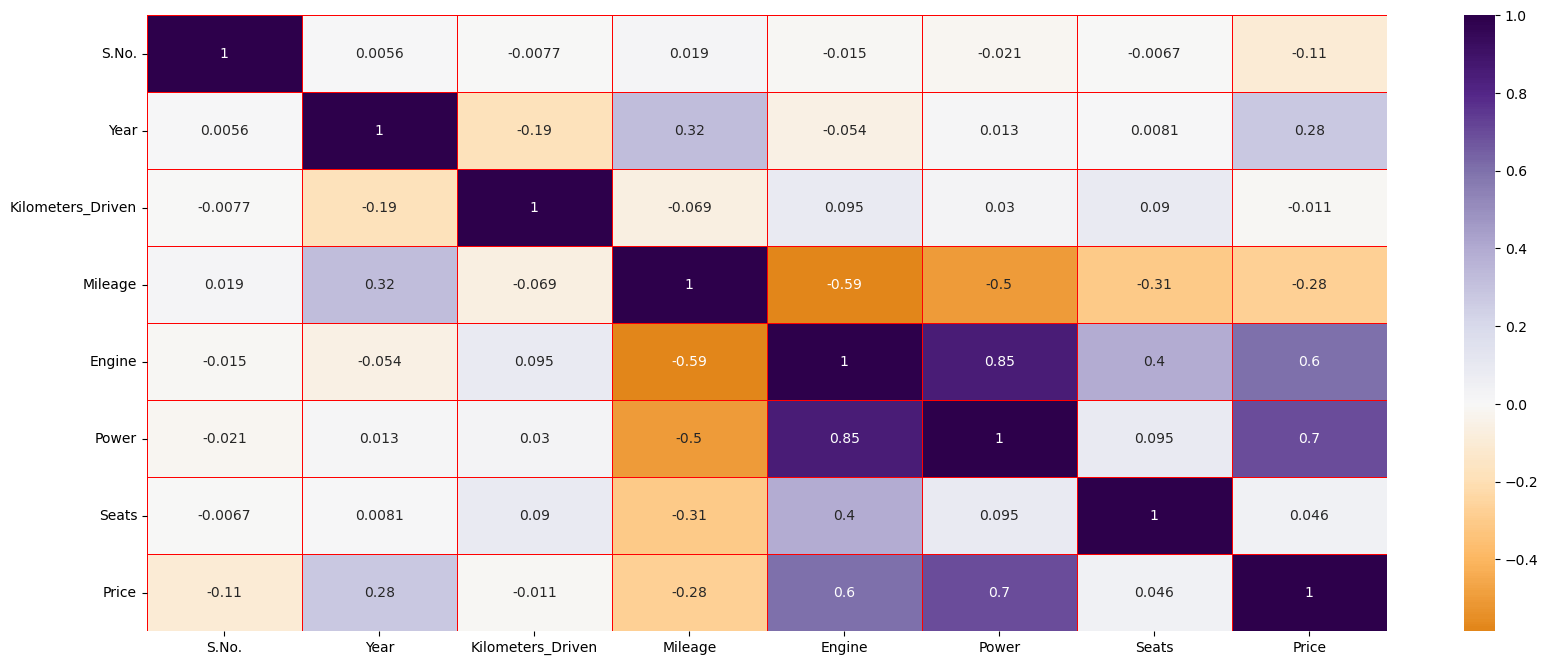

In [77]:
plt.figure(figsize=(20,8))
sb.heatmap(df.corr(),annot=True,linewidths=.5,linecolor='r',center=0,cmap='PuOr');

#conclusion:-Mileage parameters have to be excluded in our analysis beacuse they corrleate with the 'Engine variables.

In [82]:
num=[]
cat=[]
for i in df.columns:
    if df[i].nunique()<10:
        num.append(i)
    else:
        cat.append(i)

In [86]:
def num_cat()
for i in df.columns:
    if df[i].nunique()<10:
        print(i,df[i])

SyntaxError: invalid syntax (868871393.py, line 1)

In [17]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['Name']=a.fit_transform(df['Name'])
df['Location']=a.fit_transform(df['Location'])
df['Fuel_Type']=a.fit_transform(df['Fuel_Type'])
df['Transmission']=a.fit_transform(df['Transmission'])
df['Owner_Type']=a.fit_transform(df['Owner_Type'])
df['Mileage']=a.fit_transform(df['Mileage'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   int32  
 2   Location           7253 non-null   int32  
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   int32  
 6   Transmission       7253 non-null   int32  
 7   Owner_Type         7253 non-null   int32  
 8   Mileage            7253 non-null   int64  
 9   Engine             7253 non-null   float64
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  New_Price          7253 non-null   object 
 13  Price              7253 non-null   float64
dtypes: float64(4), int32(5), int64(4), object(1)
memory usage: 651.8+ KB


In [40]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               439
Engine                151
Power                 384
Seats                  10
New_Price             625
Price                1373
dtype: int64

# 4.Data Visualization.

In [19]:
num=[]
cat=[]
for i in df.columns:
    if df[i].nunique()<30:
        cat.append(i)
    else:
        num.append(i)

In [20]:
num

['S.No.',
 'Name',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'New_Price',
 'Price']

In [21]:
cat

['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

In [22]:
df.drop(columns='S.No.',axis=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1310,9,2010,72000,0,1,0,423,998.0,58.16,5.0,63.71 Lakh,1.75
1,560,10,2015,41000,1,1,0,299,1582.0,126.20,5.0,63.71 Lakh,12.50
2,529,2,2011,46000,4,1,0,257,1199.0,88.70,5.0,8.61 Lakh,4.50
3,1160,2,2012,87000,1,1,0,331,1248.0,88.76,7.0,63.71 Lakh,6.00
4,23,3,2013,40670,1,0,2,160,1968.0,140.80,5.0,63.71 Lakh,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2013,5,2011,89411,1,1,0,322,1598.0,103.60,5.0,63.71 Lakh,5.64
7249,1988,9,2015,59000,4,0,0,224,1197.0,103.60,5.0,63.71 Lakh,5.64
7250,1499,8,2012,28000,1,1,0,380,1461.0,63.10,5.0,63.71 Lakh,5.64
7251,1988,10,2013,52262,4,0,3,223,1197.0,103.60,5.0,63.71 Lakh,5.64


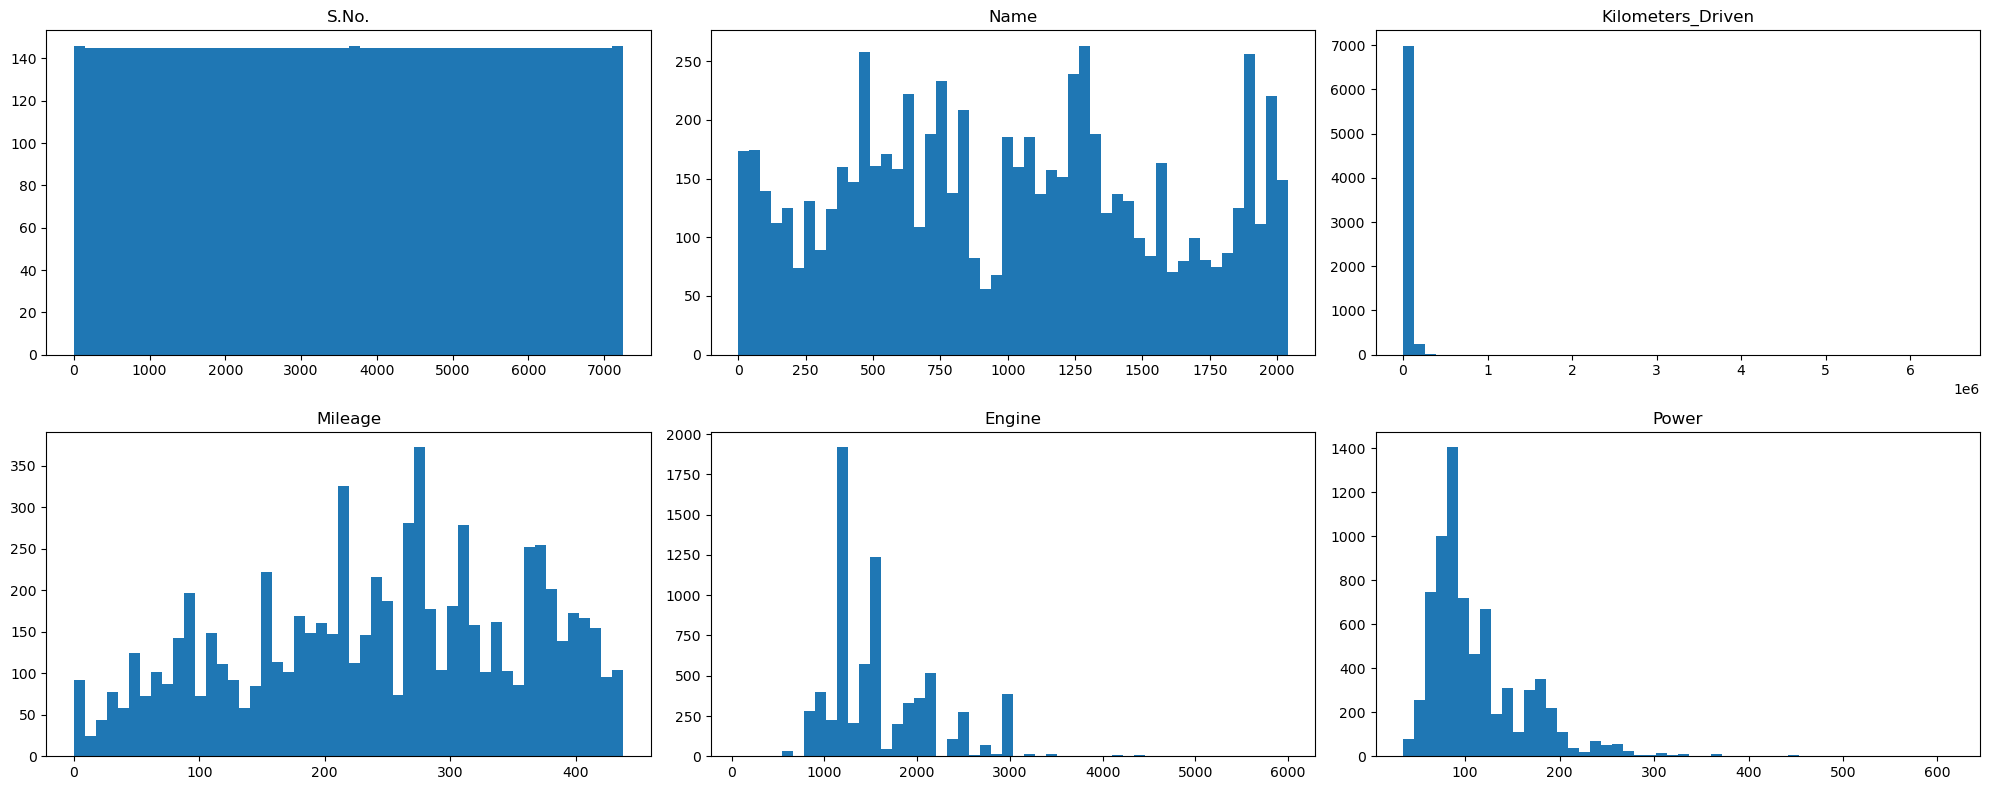

In [23]:
numeric_cols=num
num_cols=3
bins=50
num_rows=int(len(numeric_cols)/num_cols)
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))
for col,ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(df[col],bins=bins)
    ax.set_title(col)


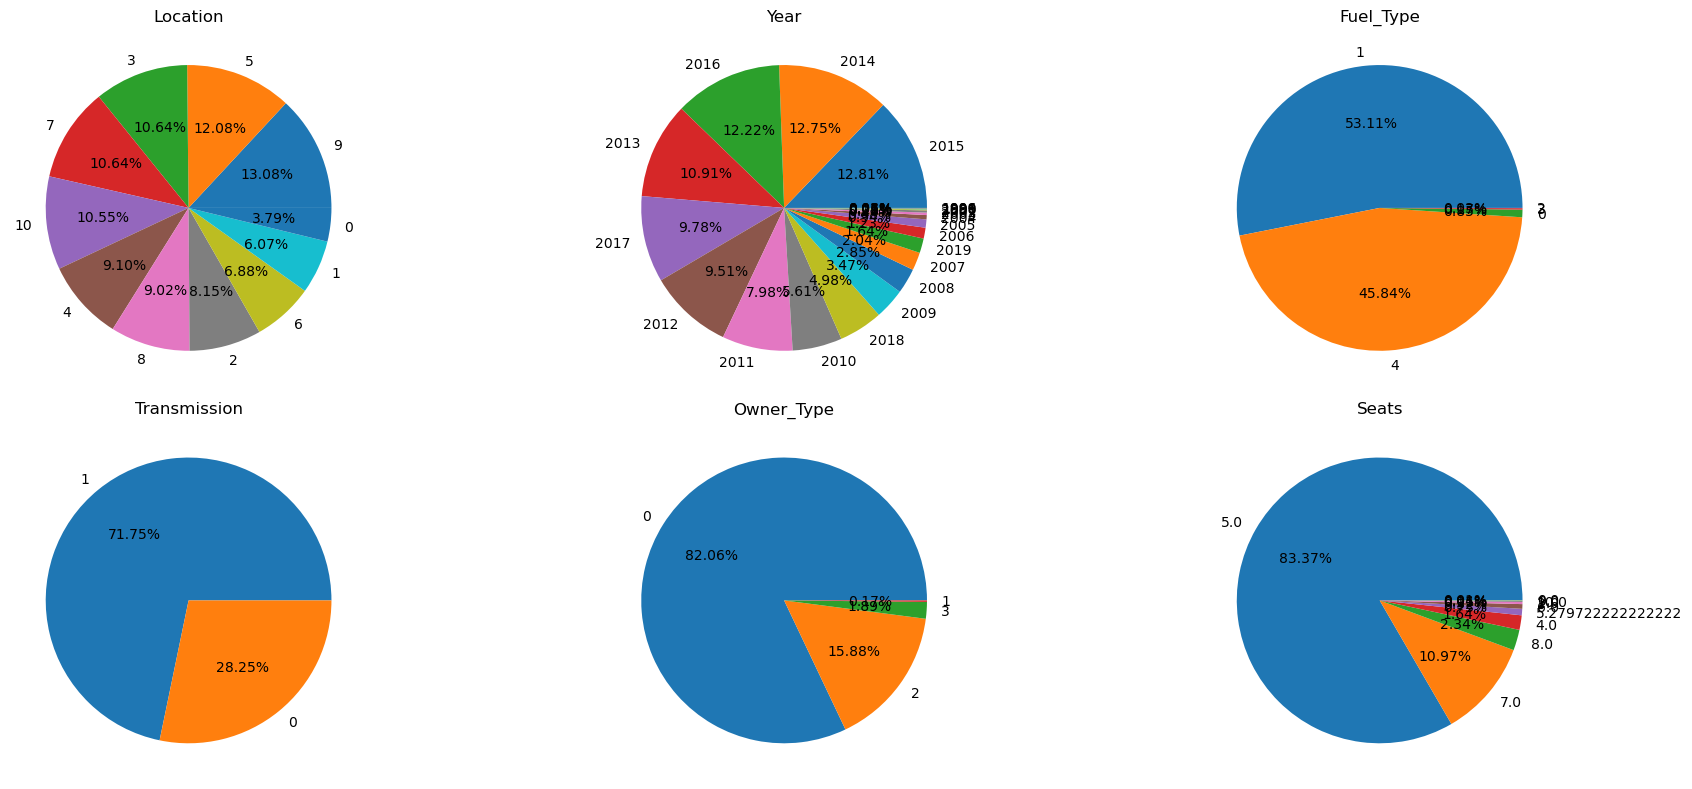

In [29]:
cat_cols=cat
num_col=3
num_rows=int(len(cat_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,8))
for col,ax in zip(cat_cols,axs.flatten()[:len(cat_cols)]):
    ax.pie(labels=df[col].value_counts().index,x=df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)

# Finding the Outliers.

In [61]:
df['Kilometers_Driven'].dtypes

dtype('int64')

In [25]:
num

['S.No.',
 'Name',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'New_Price',
 'Price']

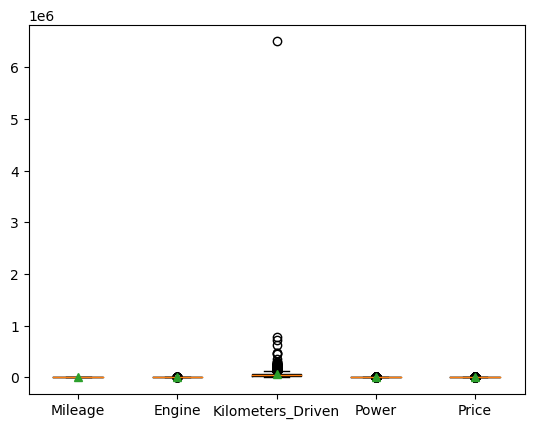

In [38]:
plt.boxplot([df['Mileage'],df['Engine'],df['Kilometers_Driven'],df['Power'],df['Price']],labels=['Mileage','Engine','Kilometers_Driven','Power','Price'],showmeans=True);

#conclusion:-Kilometers_Driven have the more outliers as compare to the other parameters.

# 5.Model Buliding.

In [47]:
x=df.drop(columns=['Price','New_Price','Name','Fuel_Type','Transmission','Owner_Type'],axis=1)
y=df['Price']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=100)

In [49]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [95]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.6440063536001889

In [96]:
model.fit(x_test,y_test)
model.score(x_train,y_train)

0.6155641071902024

In [97]:
y_pred=model.predict(x_test)
y_pred

array([ 3.7454023 ,  3.7454023 ,  3.7454023 , ...,  5.92973864,
       22.46384906,  5.92973864])

# Evaluate the model by calculating MSE,MAE,RMSE.

In [98]:
from sklearn.metrics import mean_squared_error
MSE=print(mean_squared_error(y_test,y_pred))

38.167467055259536


In [99]:
from sklearn.metrics import mean_absolute_error
MAE=print(mean_absolute_error(y_test,y_pred))

3.1901626473365194


In [100]:
from sklearn.metrics import mean_squared_error
RMSE=print(mean_squared_error(y_test,y_pred,squared=False))

6.177982442129432


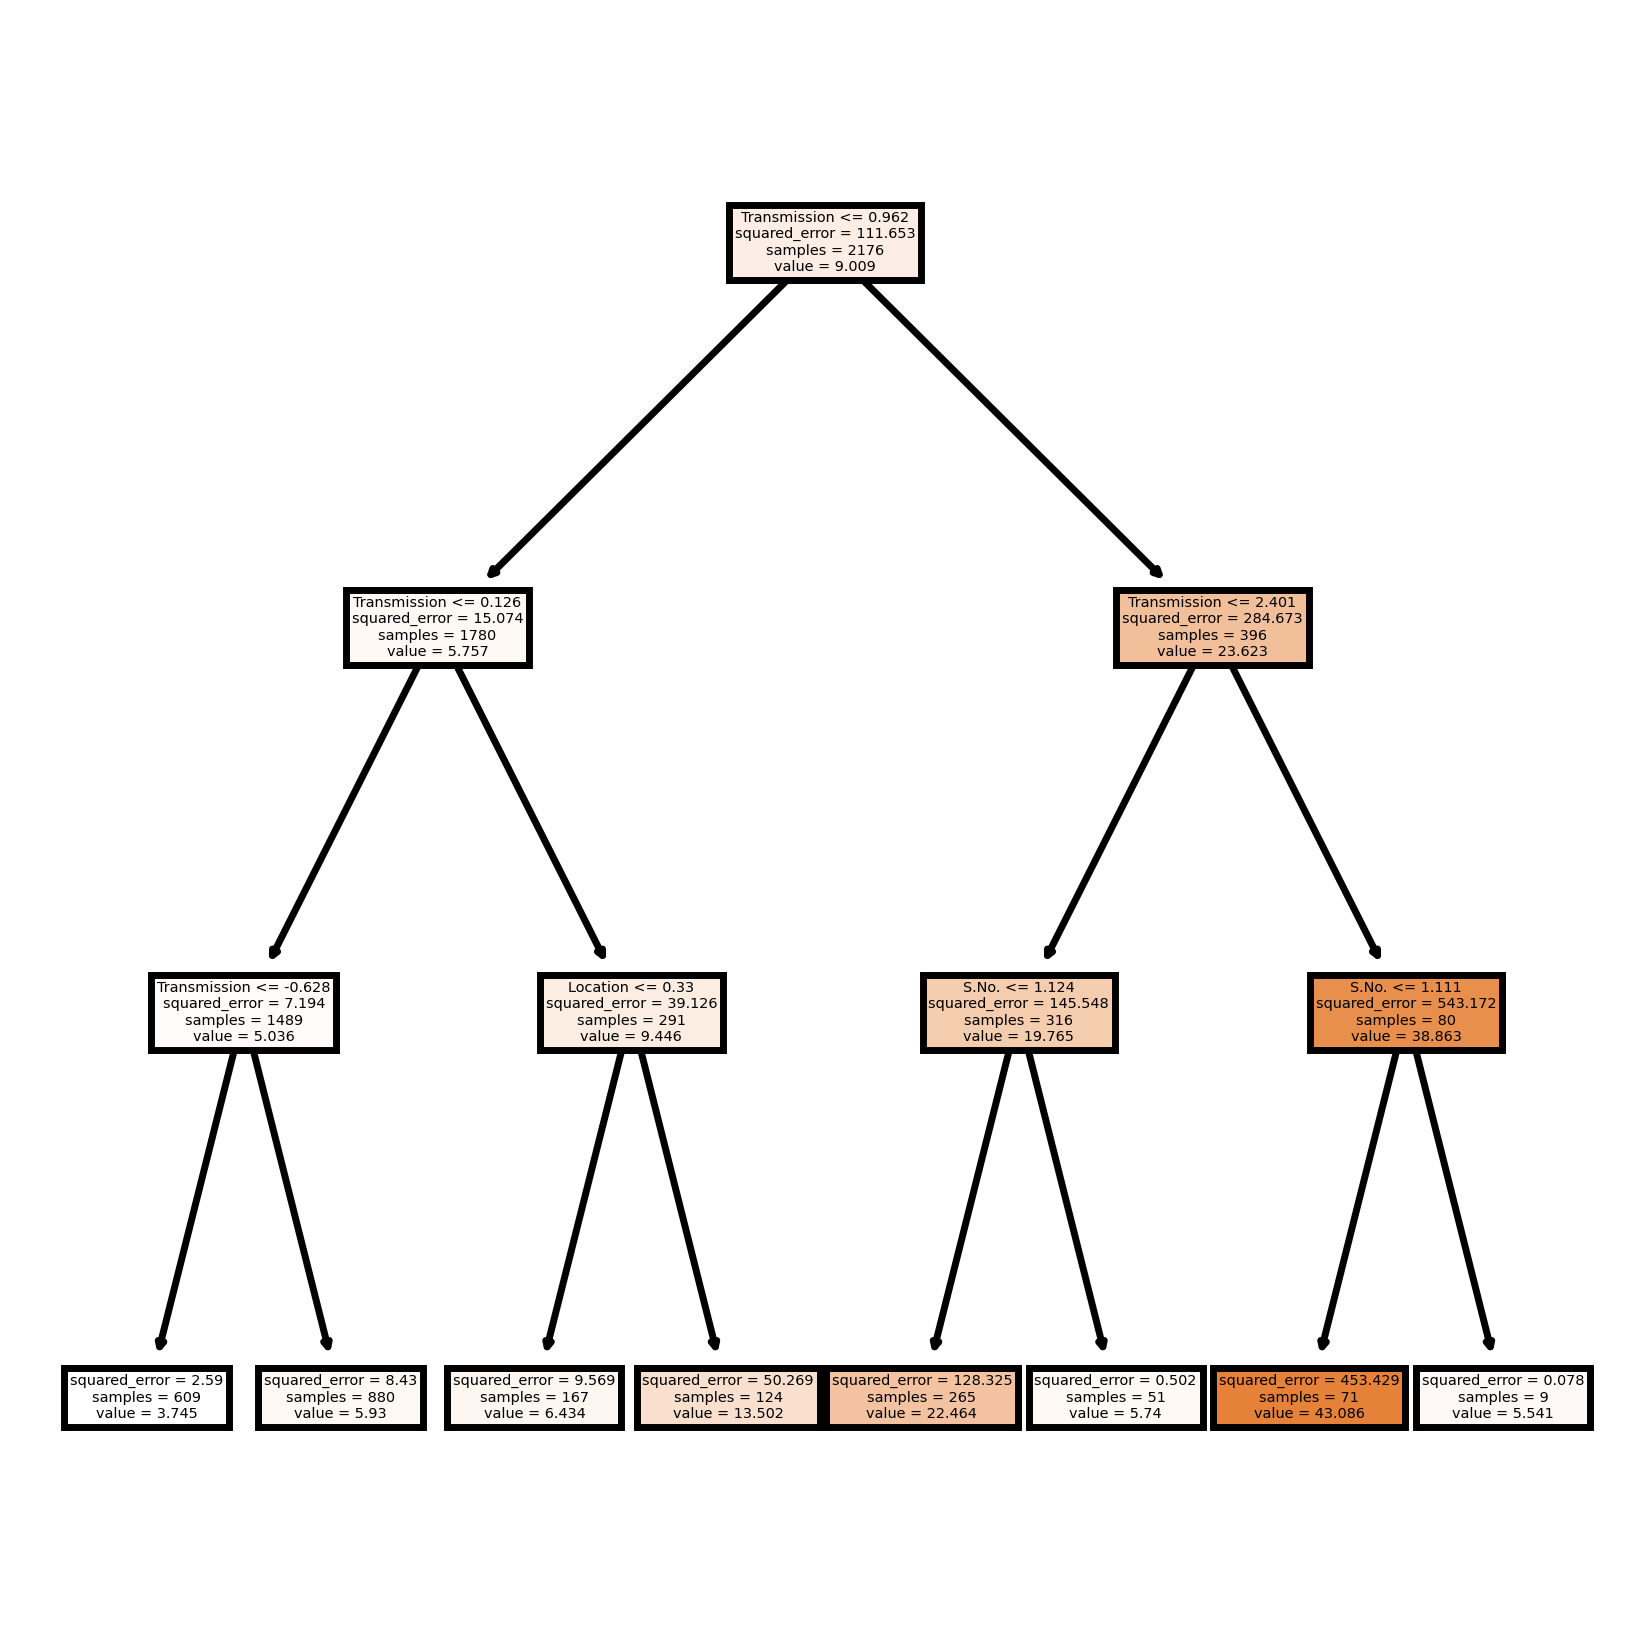

In [101]:
from sklearn import tree
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=500)
tree.plot_tree(model,feature_names=df.columns,filled=True)
fig.savefig('old_cars.png')

# Cross validation.

In [147]:
#Hold_out cv
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
p=[1,3,5,7,9,11,13,15,17,19]
HO=train_test_split(p,test_size=.2,random_state=2)
HO

[[11, 1, 15, 5, 7, 13, 19, 17], [9, 3]]

In [149]:
#Leave_one_out cv
from sklearn.model_selection import LeaveOneOut
p=[1,3,5,7,9,11,13,15,17,19]
LOOCV=LeaveOneOut()
for i,j in LOOCV.split(p):
    print(i,j)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [247]:
#K-Fold cv
from sklearn.model_selection import KFold
p=[1,3,5,7,9,11,13,15,17,19]
Kflod=KFold(n_splits=5,shuffle=False, random_state=None)
for i,j in Kflod.split(p):
    print(i,j)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [302]:
def rmse(score):
    rmse=np.sqrt(-score)
    print("{}".format(rmse))
    

In [299]:
x_train.shape

(5077, 8)

In [298]:
y_train.shape

(5077,)

In [306]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for value in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= value, random_state= 42), x_train, y_train, cv= Kflod)
    print(f'For max depth: {value}')
    print(np.sqrt(score.mean()))
    #rmse(score.mean())

For max depth: 1
0.6277290722306736
For max depth: 2
0.7118236190927266
For max depth: 3
0.7787699275343353
For max depth: 4
0.8575815972569398
For max depth: 5
0.8688572351225723
For max depth: 6
0.8724631843466176
For max depth: 7
0.854808348343868
For max depth: 8
0.8839163712647474
For max depth: 9
0.8667266216271815
For max depth: 10
0.8634510352623919
For max depth: 11
0.8583740450456167
For max depth: 12
0.8549417871628653
For max depth: 13
0.87586814026201
For max depth: 14
0.8776852807319346
For max depth: 15
0.8590301500055466


#conclusion:-Max_depth of 8 having the high error.